In [166]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import re

In [120]:
df = pd.read_csv(r"C:\Desktop\Datasets\archive\TASK2-DATA(1).csv")

In [122]:
df.head()

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,15/16,LaLiga,26,2/28/16,H,FC Barcelona,Sevilla FC,2:O1,RW,31,1:O1,Direct free kick,NaN
1,2O/21,NaN,NaN,NaN,A,FC Barcelona,NaN,1:OO,NaN,89,NaN,NaN,NaN
2,16/17,LaLiga,25,O3-O1-17,H,FC Barcelona,Sporting GijÃ³n,6:O1,RW,9,1:OO,Header,Javier Mascherano
3,Dec-13,LaLiga,36,O5-O8-13,H,Real Madrid,Malaga CF,6:O2,LW,26,2:O1,Right-footed shot,Xabi Alonso
4,22/23,UEFA Champions League,Group Stage,1O/5/22,A,Paris Saint-Germain,SL Benfica,1:1,AM,22,O:1,Left-footed shot,Neymar


In [124]:
df.columns

Index(['Season', 'Competition', 'Matchday', 'Date', 'Venue', 'Club',
       'Opponent', 'Result', 'Playing_Position', 'Minute', 'At_score', 'Type',
       'Goal_assist'],
      dtype='object')

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564 entries, 0 to 1563
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Season            1511 non-null   object
 1   Competition       1497 non-null   object
 2   Matchday          1507 non-null   object
 3   Date              1498 non-null   object
 4   Venue             1504 non-null   object
 5   Club              1508 non-null   object
 6   Opponent          1500 non-null   object
 7   Result            1500 non-null   object
 8   Playing_Position  1435 non-null   object
 9   Minute            1500 non-null   object
 10  At_score          1507 non-null   object
 11  Type              1475 non-null   object
 12  Goal_assist       1012 non-null   object
dtypes: object(13)
memory usage: 159.0+ KB


In [128]:
df.duplicated().sum()

50

In [130]:
df.drop_duplicates(inplace=True)

In [132]:
df.isna().sum()

Season               51
Competition          64
Matchday             55
Date                 64
Venue                58
Club                 52
Opponent             60
Result               62
Playing_Position    122
Minute               62
At_score             54
Type                 85
Goal_assist         537
dtype: int64

In [134]:
def get_null_percentages(df, columns):
    result = {}
    for column in columns:
        if column in df.columns:
            null_count = df[column].isna().sum()
            total_count = len(df)
            null_percentage = (null_count / total_count) * 100
            result[column] = round(null_percentage, 2)
        else:
            print("Column not found")
    return result

null_percentages = get_null_percentages(df, df.columns)
null_percentages
for column, percentage in null_percentages.items():
    if isinstance(percentage, float):
        print(f"{column}: {percentage} %")
    else:
        print(f"{column}: {percentage}")

Season: 3.37 %
Competition: 4.23 %
Matchday: 3.63 %
Date: 4.23 %
Venue: 3.83 %
Club: 3.43 %
Opponent: 3.96 %
Result: 4.1 %
Playing_Position: 8.06 %
Minute: 4.1 %
At_score: 3.57 %
Type: 5.61 %
Goal_assist: 35.47 %


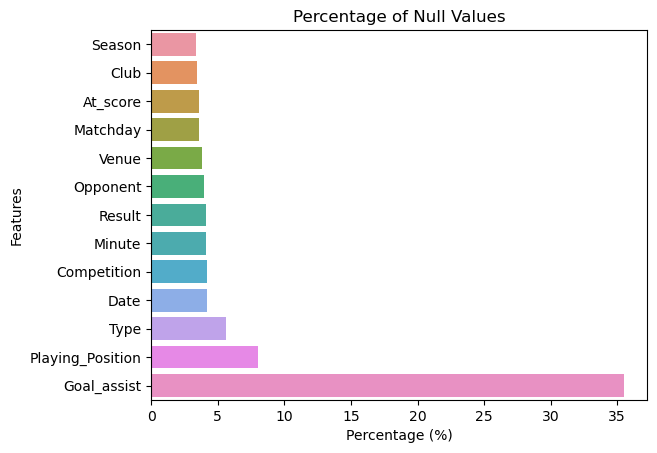

In [136]:
null_values = pd.Series(data=null_percentages).sort_values()
sns.barplot(x=null_values.values, y=null_values.index).set(title='Percentage of Null Values', xlabel='Percentage (%)', ylabel='Features')
plt.show()

In [138]:
df['Goal_assist'] = df['Goal_assist'].fillna('No assistance')

In [140]:
df.dropna(inplace=True)

In [142]:
df.head()

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,15/16,LaLiga,26,2/28/16,H,FC Barcelona,Sevilla FC,2:O1,RW,31,1:O1,Direct free kick,No assistance
2,16/17,LaLiga,25,O3-O1-17,H,FC Barcelona,Sporting GijÃ³n,6:O1,RW,9,1:OO,Header,Javier Mascherano
3,Dec-13,LaLiga,36,O5-O8-13,H,Real Madrid,Malaga CF,6:O2,LW,26,2:O1,Right-footed shot,Xabi Alonso
4,22/23,UEFA Champions League,Group Stage,1O/5/22,A,Paris Saint-Germain,SL Benfica,1:1,AM,22,O:1,Left-footed shot,Neymar
5,15/16,UEFA Champions League,last 16,O3-O8-16,H,Real Madrid,AS Roma,2:OO,CF,64,1:OO,Right-footed shot,Lucas Vazquez


In [144]:
df['Season'].unique()

array(['15/16', '16/17', 'Dec-13', '22/23', '13/14', '1O/11', '17/18',
       'O8/O9', 'O3/O4', '11-Dec', 'O9/1O', '18/19', '19/2O', '14/15',
       '2O/21', '21/22', '11/12', 'O6/O7', 'O7/O8', 'O5/O6', 'O4/O5',
       'O2/O3'], dtype=object)

In [146]:
df['Season'] = df['Season'].replace('11-Dec', '11/12')
df['Season'] = df['Season'].replace('Dec-13', '12/13')

In [148]:
df['Date'] = df.Date.str.replace('-', '/')

In [154]:
df['Minute'].unique()

array(['31', '9', '26', '22', '64', '81', '36', '63', '32', '87', '68',
       '74', '55', '11', '86', '8O', '51', '85', '49', '45', '89', '3O',
       '88', '53', '59', '72', '54', '42', '9O', '25', '39', '16', '28',
       '73', '12', '18', '45+1', '27', '44', '13', '77', '82', '9O+1',
       '65', '78', '47', '75', '3', '37', '71', '69', '8', '57', '61',
       '1O', '17', '21', '24', '76', '41', '83', '23', '2', '33', '5',
       '58', '45+2', '43', '62', '2O', '29', '4O', '48', '56', '6O', '38',
       '4', '9O+6', '15', '34', '9O+2', '52', '35', '66', '67', '19',
       '84', '1', '5O', '79', '6', '7O', '9O+4', '11O', '46', '1O4',
       '9O+3', '12O', '97', '14', '7', '45+7', '1O3', '45+4', '9O+5',
       '1O9', '9O+7', '1O5'], dtype=object)

In [246]:
#minutes_df = df['Minute'].loc[df['Minute'].str.contains('\+')]
#minutes_df = minutes_df.str.split('+')
#for row in minutes_df:
    #row = list(map(int, row))
    #row = eval(row)

In [220]:
df['Matchday'].unique()
# replace all the string values with integers

array(['26', '25', '36', 'Group Stage', 'last 16', '3O', '3', '24', '9',
       '31', '34', 'Fifth Round', '15', '1', '2', '28', 'Round of 16',
       '16', '19', '27', 'Quarter-Finals', '17', '12', '33', 'final',
       '29', '5', '11', '13', '18', 'Semi-Finals', '35', '32', '6', '37',
       '21', '2O', '38', '1O', '7', '5th round', '4', '22', '8', 'Final',
       '23', '14', 'Sixth Round', 'Fourth Round', '4th round'],
      dtype=object)

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


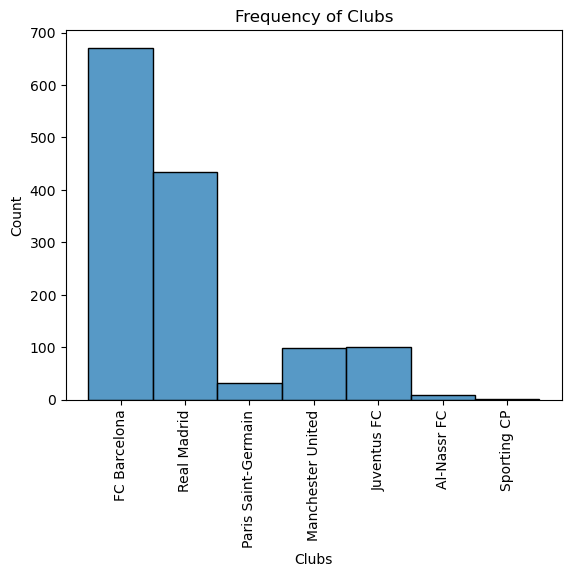

In [234]:
sns.histplot(df['Club']).set(title="Frequency of Clubs", xlabel='Clubs')
plt.xticks(rotation='vertical')
plt.show()

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


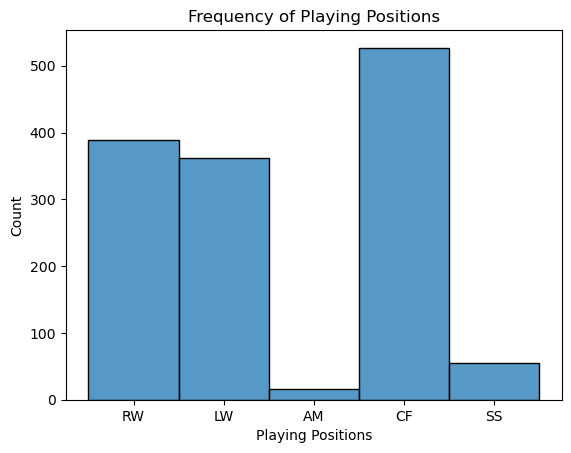

In [240]:
sns.histplot(df['Playing_Position']).set(title="Frequency of Playing Positions", xlabel='Playing Positions')
plt.show()

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


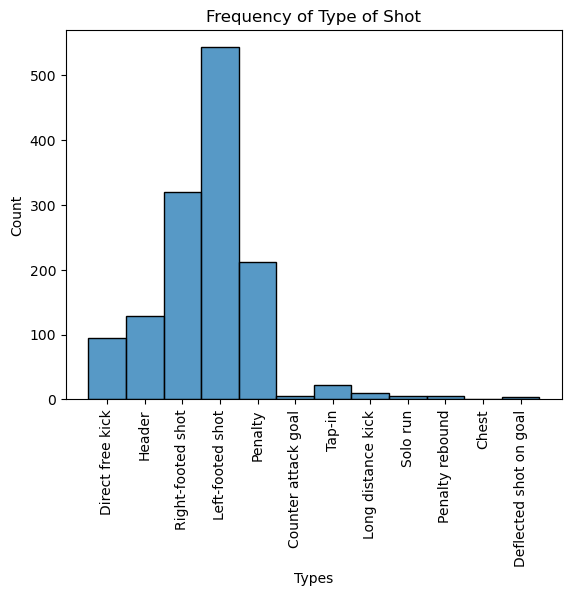

In [244]:
sns.histplot(df['Type']).set(title="Frequency of Type of Shot", xlabel='Types')
plt.xticks(rotation='vertical')
plt.show()

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


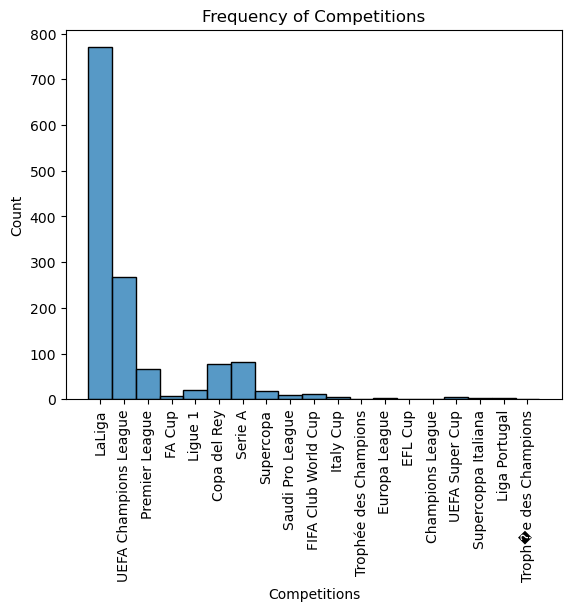

In [252]:
sns.histplot(df['Competition']).set(title="Frequency of Competitions", xlabel="Competitions")
plt.xticks(rotation='vertical')
plt.show()